## RECRUTING WORKERS IN INTERNET

SITUATION:
Gold mining company needs workers for seasonal work.
Internet promo use for recruting.
Management promo based on standart dashboards of Yandex systems.
We have statistic data.
two methods used for recruting: context ads (ADS) and publications in specialized online communities (PR).

TARGETS:
Based analysis show low effective PR activity (low target actions). 
But 
1. I should check is PR has any additional effect (for example, direct visits to the site)
2. Check does it grow of popularity site? 
3. Does any cyclical in time trends? (weekdays)
4. Make a general model for forecasting visits to site for prognosis and optimisation promo strategy.

In [1]:
#импорт всех необходимых библиотек

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

C:\Users\OLEG\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
excel_file = 'C:/Users/OLEG/Jupyter/Gold/ads.xls'
df = pd.read_excel(excel_file)
df.head()

,data,shows,clicks,sum,price per click,deep,letter_pers,form_pers,hr_pers,messenger_pers,letter,form,hr,messenger
0,15.01.2024,14553,123,1747.88,14.21,1.77,0.00,0.81,0.81,0.00,0,1,1,0
1,16.01.2024,15920,180,800.00,4.44,2.13,1.67,2.78,2.22,0.00,3,5,4,0
2,17.01.2024,6098,115,876.32,7.62,1.71,0.87,1.74,1.74,0.00,1,2,2,0
3,18.01.2024,14214,99,1493.44,15.09,2.85,1.01,4.04,3.03,2.02,1,4,3,2
4,19.01.2024,11814,122,910.00,7.46,1.94,3.28,3.28,2.46,0.82,4,4,3,1


#### DESCRIBING DATA

data - Data 
shows - shows AD 
clicks - clicks on AD 
sum - per day 
price per click
deep - how many site pages looking (average per day)


Results persantage (action / clicks * 100%)
- letter_pers - send letter
- form_pers - fill form
- hr_pers - send message to HR department
- messenger_pers - go to messenger


Results (actions per day)
- letter
- form
- hr
- messenger

Data from 15/01/24 to 13/04/24
no missing data


In [3]:
df['date'] = pd.to_datetime(df['data'], format='%d.%m.%Y')
df.head()

,data,shows,clicks,sum,price per click,deep,letter_pers,form_pers,hr_pers,messenger_pers,letter,form,hr,messenger,date
0,15.01.2024,14553,123,1747.88,14.21,1.77,0.00,0.81,0.81,0.00,0,1,1,0,2024-01-15
1,16.01.2024,15920,180,800.00,4.44,2.13,1.67,2.78,2.22,0.00,3,5,4,0,2024-01-16
2,17.01.2024,6098,115,876.32,7.62,1.71,0.87,1.74,1.74,0.00,1,2,2,0,2024-01-17
3,18.01.2024,14214,99,1493.44,15.09,2.85,1.01,4.04,3.03,2.02,1,4,3,2,2024-01-18
4,19.01.2024,11814,122,910.00,7.46,1.94,3.28,3.28,2.46,0.82,4,4,3,1,2024-01-19


In [4]:
df.drop(['data', 'letter_pers', 'form_pers', 'hr_pers', 'messenger_pers'], axis=1, inplace=True)

In [6]:
# Вывод названий столбцов
print("Названия столбцов:")
print(df.columns)

# Создание пустого DataFrame для хранения основных характеристик переменных
summary_df = pd.DataFrame(columns=['Переменная', 'Среднее', 'Медиана', 'Минимум', 'Максимум', 'Стандартное отклонение'])

# Цикл для вычисления основных характеристик каждой переменной и добавления их в summary_df
for column in df.columns:
    mean = df[column].mean()
    median = df[column].median()
    minimum = df[column].min()
    maximum = df[column].max()
    std_dev = df[column].std()
    
    summary_df = summary_df.append({
        'Переменная': column,
        'Среднее': mean,
        'Медиана': median,
        'Минимум': minimum,
        'Максимум': maximum,
        'Стандартное отклонение': std_dev
    }, ignore_index=True)

# Вывод нового DataFrame с основными характеристиками переменных
print("\nОсновные характеристики переменных:")
print(summary_df)


Названия столбцов:
Index(['shows', 'clicks', 'sum', 'price per click', 'deep', 'letter', 'form',
       'hr', 'messenger', 'date'],
      dtype='object')

Основные характеристики переменных:
        Переменная              Среднее              Медиана  \
0            shows         18419.255556              15098.0   
1           clicks           339.822222                301.5   
2              sum          1271.976444             1222.895   
3  price per click             4.385667                 3.36   
4             deep             1.787333                 1.77   
5           letter            16.888889                 16.0   
6             form             8.288889                  7.0   
7               hr             8.011111                  7.0   
8        messenger             8.077778                  7.0   
9             date  2024-02-28 12:00:00  2024-02-28 12:00:00   

               Минимум             Максимум      Стандартное отклонение  
0                 4906        

In [7]:
#создаем скользящие средние, последующий анализ показал, что есть внутринедельные колебания, 
#поэтому берем интервал в 7 дней для рассчета

df['shows_7'] = df['shows'].rolling(window=7).mean()
df['clicks_7'] = df['clicks'].rolling(window=7).mean()

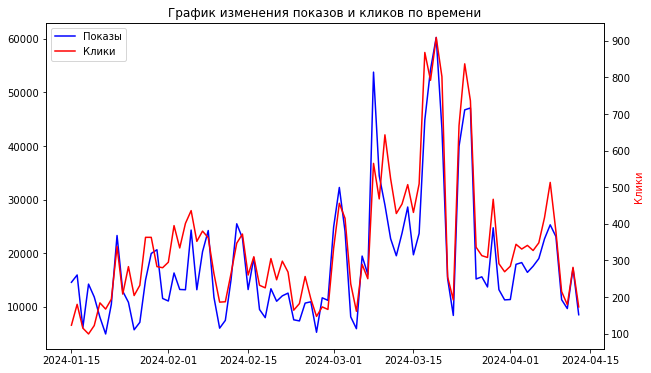

In [8]:
# Установка размера графика
plt.figure(figsize=(10, 6))  # ширина, высота

# Построение графика для shows
shows_line = plt.plot(df['date'], df['shows'], color='blue', label='Показы')

# Добавление второй оси для графика clicks
ax2 = plt.twinx()
clicks_line = ax2.plot(df['date'], df['clicks'], color='red', label='Клики')

# Добавление названий вертикальных осей с обеих сторон
plt.ylabel('Показы', color='blue')
ax2.set_ylabel('Клики', color='red')

# Добавление названий осей x и заголовка
plt.xlabel('Дата')
plt.title('График изменения показов и кликов по времени')

# Добавление легенды
plt.legend([shows_line[0], clicks_line[0]], ['Показы', 'Клики'], loc='upper left')

# Вывод графика
plt.show()




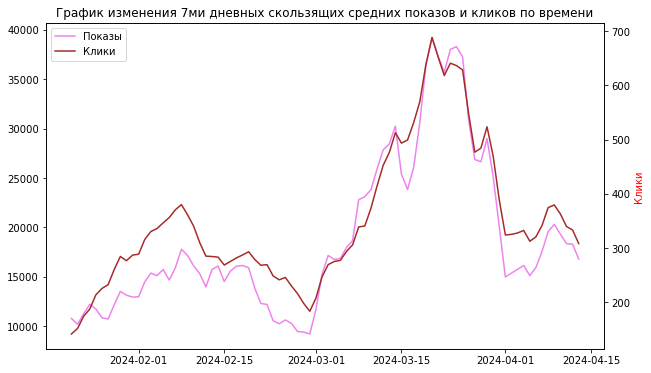

In [9]:
# Установка размера графика
plt.figure(figsize=(10, 6))  # ширина, высота

# Построение графика для shows
shows_line = plt.plot(df['date'], df['shows_7'], color='violet', label='Показы_7')
# Добавление второй оси для графика clicks
ax2 = plt.twinx()
clicks_line = ax2.plot(df['date'], df['clicks_7'], color='brown', label='Клики_7')
# Добавление названий вертикальных осей с обеих сторон
plt.ylabel('Показы', color='blue')
ax2.set_ylabel('Клики', color='red')

# Добавление названий осей x и заголовка
plt.xlabel('Дата')
plt.title('График изменения 7ми дневных скользящих средних показов и кликов по времени')

# Добавление легенды
plt.legend([shows_line[0], clicks_line[0]], ['Показы', 'Клики'], loc='upper left')

# Вывод графика
plt.show()


ПРОМЕЖУТОЧНЫЙ ВЫВОД:
- Зависимость между кликами и показами очень сильная, но не линейная
- Заметны измнения пропорций показы/клики в разные моменты времени 


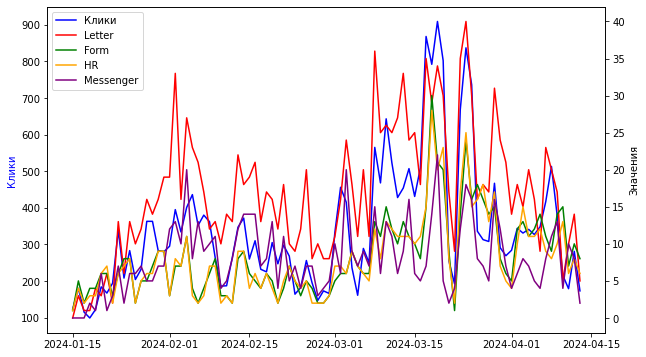

In [10]:
# Установка размера графика
def set_size(width, height, ax=None):
    """Установка размера графика"""
    if not ax:
        fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    plt.close(fig)
    return ax

# Создание графика
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 6)  # Установка размера графика
ax1.plot(df['date'], df['clicks'], color='blue', label='Клики')
ax1.set_ylabel('Клики', color='blue')

# Создание второй оси
ax2 = ax1.twinx()
ax2.plot(df['date'], df['letter'], color='red', label='Letter')
ax2.plot(df['date'], df['form'], color='green', label='Form')
ax2.plot(df['date'], df['hr'], color='orange', label='HR')
ax2.plot(df['date'], df['messenger'], color='purple', label='Messenger')
ax2.set_ylabel('Значения', color='black')

# Настройка легенды
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Отображение графика
plt.show()


In [11]:
#Создаем переменную: сумму всех видов целевых действий

df['all_actions'] = df['letter'] + df['form'] + df['hr'] + df['messenger']

In [12]:
df['clicks_dev10'] = df['clicks']/10
df['shows_dev1000'] = df['shows']/1000

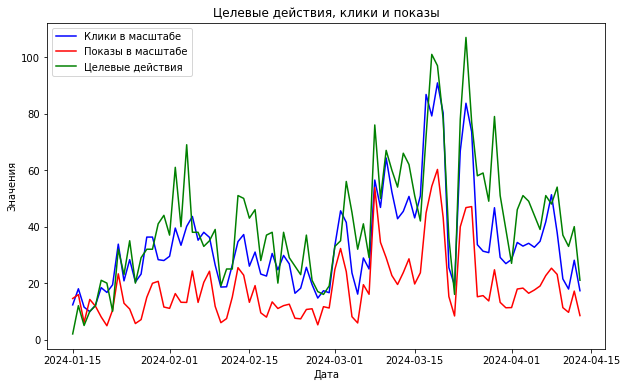

In [135]:
# Установка размера графика
plt.figure(figsize=(10, 6))

# Построение графика для clicks_dev10
plt.plot(df['date'], df['clicks_dev10'], color='blue', label='Клики в масштабе')

# Построение графика для shows_dev1000
plt.plot(df['date'], df['shows_dev1000'], color='red', label='Показы в масштабе')

# Построение графика для all_actions
plt.plot(df['date'], df['all_actions'], color='green', label='Целевые действия')

# Добавление названия осей и заголовка
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.title('Целевые действия, клики и показы')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()


ПРОМЕЖУТОЧНЫЕ ВЫВОДЫ:
- последний график - масштабированные данные показов, кликов и всех видов целевых действий. Видим сильную, но не линейную зависимость
- по данным менеджера во второй половине марта происходило обучение новой РК. Видно, что с определенного момента увеличился разрыв между кликами и целевыми действиями. РК стала эффективнее.
- отдельные виды активностей имеют схожие, но не полностью совпадающие тенденции. 


In [14]:
df['date'] = pd.to_datetime(df['date'])

# Преобразование столбца 'clicks' сдвигом на 1 день
df['clicks_shifted'] = df['clicks'].shift(1)
df['shows_shifted'] = df['shows'].shift(1)

#### CORRELATION ANALYSIS



In [15]:
df_temp = df.drop(columns=['date'])

# Построение корреляционной матрицы
correlation_matrix = df_temp.corr()

# Вывод корреляционной матрицы
print(correlation_matrix.round(2))

                 shows  clicks   sum  price per click  deep  letter  form  \
shows             1.00    0.92  0.50            -0.30 -0.09    0.72  0.72   
clicks            0.92    1.00  0.50            -0.43 -0.13    0.84  0.76   
sum               0.50    0.50  1.00             0.48  0.11    0.42  0.43   
price per click  -0.30   -0.43  0.48             1.00  0.36   -0.45 -0.32   
deep             -0.09   -0.13  0.11             0.36  1.00   -0.13 -0.01   
letter            0.72    0.84  0.42            -0.45 -0.13    1.00  0.62   
form              0.72    0.76  0.43            -0.32 -0.01    0.62  1.00   
hr                0.72    0.78  0.45            -0.33 -0.01    0.66  0.97   
messenger         0.53    0.60  0.27            -0.36 -0.18    0.71  0.43   
shows_7           0.64    0.69  0.38            -0.31 -0.12    0.64  0.70   
clicks_7          0.59    0.69  0.41            -0.28 -0.15    0.64  0.67   
all_actions       0.79    0.89  0.47            -0.44 -0.10    0.91  0.86   

ПРОМЕЖУТОЧНЫЕ ВЫВОДЫ:
- Показы и клики имеют высокую корреляцию 0,92
- клики и целевые действия суммарные так же 0,89 
при этом отдельные виды целевых дейсвтий несколько меньше. 
- Самое низкое значение - у мессендежров 0,6 от кликов
- Прослеживаются зависимости от предыдущего дня: 0,63 по показам и 0,72 по кликам. Т.е. тенденции могут жить не менее 2х дней или имеются влияния предыдущих дней (интересно, что для кликов этот параметр выше, т.е. это может означать, что в последующие дни люди делают доп целевые действия)
- Глубина просмотров ни от чего не зависит. 
Как видно было раньше имеет низкое стандартное отклонение
- hr и формы имеют почти линейную зависимость, мессенджер коррелирует с письмами


In [16]:
df['weekday'] = df['date'].dt.dayofweek

In [17]:
#Проверяем влияние дня недели на показатели

dff = df.drop(columns=['date'])

# Группировка по дню недели и вычисление средних для всех остальных переменных
grouped_means = dff.groupby('weekday').mean()

# Вывод результатов
print(grouped_means.round(1))

           shows  clicks     sum  price per click  deep  letter  form   hr  \
weekday                                                                      
0        21333.8   381.8  1541.7              5.0   1.8    16.3   8.2  7.4   
1        19734.5   342.4  1340.4              4.4   1.8    16.9   8.9  8.3   
2        17600.6   325.4  1337.1              4.9   1.8    16.0   9.3  9.5   
3        15143.2   274.8  1192.7              5.2   1.8    13.9   7.3  6.8   
4        18337.6   311.9  1101.3              3.7   1.8    17.8   7.5  7.5   
5        17083.5   327.9  1137.9              3.9   1.7    15.2   7.5  7.4   
6        19808.5   420.7  1251.0              3.5   1.9    22.4   9.4  9.2   

         messenger  shows_7  clicks_7  all_actions  clicks_dev10  \
weekday                                                            
0              8.4  18731.7     348.0         40.3          38.2   
1              8.3  18817.0     350.4         42.5          34.2   
2              6.8  18879

ПРОМЕЖУТОЧНЫЕ ВЫВОДЫ:
- Самый активный день по показам - пн, по кликам - вс
- активный период показов и кликов: вс-вт
- самая высокая активнось в вс

#### PR ACTIVITY

In [18]:
excel_file = 'C:/Users/OLEG/Jupyter/Gold/pr_short.xlsx'
df_pr = pd.read_excel(excel_file)
df_pr.head()

,social_network,name,subscribers,price,date
0,tg,Геологи,587,200,2024-03-27
1,tg,ГеоВакансия,4163,0,2024-03-27
2,tg,Самосвалы СПБ. Нерудные материалы,2700,1500,2024-03-27
3,tg,Смелый Геолог,963,500,2024-03-27
4,tg,Бурятия. Дальше некуда,1661,5000,2024-03-28


In [19]:
#Создаем таблицу Pr активности по дням, считаем число публикаций 
#и суммарные значения параметров для каждого дня


grouped_pr = df_pr.groupby('date').agg({'subscribers': 'sum', 'price': 'sum', 'name': 'size'})

# Вывод результатов
print(grouped_pr.round(1))

            subscribers  price  name
date                                
2024-02-04        78462  10000     1
2024-02-27        44000      0     1
2024-03-27        27413   3200     5
2024-03-28         7329   5000     2
2024-04-02         7900      0     1
2024-04-03        23000   1400     1
2024-04-04        12907   6500     2
2024-04-05         4713      0     1
2024-04-08       110059    200     2
2024-04-09        97797   2000     2
2024-04-10       482629   2100     2


In [20]:
# Делаем общую таблицу
# Объединение DataFrame по дате с левым объединением
df = pd.merge(df, grouped_pr, how='left', on='date')
df.head()

,shows,clicks,sum,price per click,deep,letter,form,hr,messenger,date,...,clicks_7,all_actions,clicks_dev10,shows_dev1000,clicks_shifted,shows_shifted,weekday,subscribers,price,name
0,14553,123,1747.88,14.21,1.77,0,1,1,0,2024-01-15,...,NaN,2,12.3,14.553,NaN,NaN,0,NaN,NaN,NaN
1,15920,180,800.00,4.44,2.13,3,5,4,0,2024-01-16,...,NaN,12,18.0,15.920,123.0,14553.0,1,NaN,NaN,NaN
2,6098,115,876.32,7.62,1.71,1,2,2,0,2024-01-17,...,NaN,5,11.5,6.098,180.0,15920.0,2,NaN,NaN,NaN
3,14214,99,1493.44,15.09,2.85,1,4,3,2,2024-01-18,...,NaN,10,9.9,14.214,115.0,6098.0,3,NaN,NaN,NaN
4,11814,122,910.00,7.46,1.94,4,4,3,1,2024-01-19,...,NaN,12,12.2,11.814,99.0,14214.0,4,NaN,NaN,NaN


In [22]:
df['subscribers'] = df['subscribers'].fillna(0)
df['name'] = df['name'].fillna(0)

In [136]:
print('Среднее число подписчиков по каналам за день')
df['subscribers'].mean()

Среднее число подписчиков по каналам за день


9957.877777777778

In [24]:
df['subscribers_div10000'] = df['subscribers']/10000

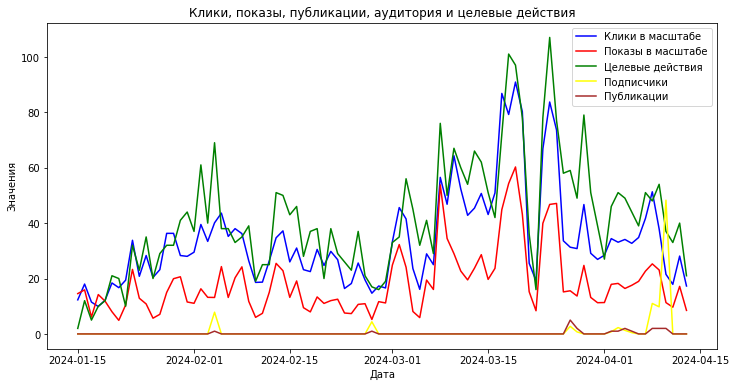

In [137]:
# Установка размера графика
plt.figure(figsize=(12, 6))

# Построение графика для clicks_dev10
plt.plot(df['date'], df['clicks_dev10'], color='blue', label='Клики в масштабе')

# Построение графика для shows_dev1000
plt.plot(df['date'], df['shows_dev1000'], color='red', label='Показы в масштабе')

# Построение графика для all_actions
plt.plot(df['date'], df['all_actions'], color='green', label='Целевые действия')

# Построение графика для all_actions
plt.plot(df['date'], df['subscribers_div10000'], color='yellow', label='Подписчики')
plt.plot(df['date'], df['name'], color='brown', label='Публикации')
# Добавление названия осей и заголовка
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.title('Клики, показы, публикации, аудитория и целевые действия')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()


In [26]:
df['subscribers_shifted1'] = df['subscribers'].shift(1)
df['subscribers_shifted3'] = df['subscribers'].shift(3)

df_temp = df.drop(columns=['date'])

# Построение корреляционной матрицы
correlation_matrix = df_temp.corr()

# Вывод корреляционной матрицы
print(correlation_matrix.round(2))

                      shows  clicks   sum  price per click  deep  letter  \
shows                  1.00    0.92  0.50            -0.30 -0.09    0.72   
clicks                 0.92    1.00  0.50            -0.43 -0.13    0.84   
sum                    0.50    0.50  1.00             0.48  0.11    0.42   
price per click       -0.30   -0.43  0.48             1.00  0.36   -0.45   
deep                  -0.09   -0.13  0.11             0.36  1.00   -0.13   
letter                 0.72    0.84  0.42            -0.45 -0.13    1.00   
form                   0.72    0.76  0.43            -0.32 -0.01    0.62   
hr                     0.72    0.78  0.45            -0.33 -0.01    0.66   
messenger              0.53    0.60  0.27            -0.36 -0.18    0.71   
shows_7                0.64    0.69  0.38            -0.31 -0.12    0.64   
clicks_7               0.59    0.69  0.41            -0.28 -0.15    0.64   
all_actions            0.79    0.89  0.47            -0.44 -0.10    0.91   
clicks_dev10

АНАЛИТИКА ПО PR АКТИВНОСТИ

Слабая связь замечена только между публикациями и заполением формы и обращением в hr в день публикации
Число публикаций имеет более высокие коэффициенты корреляций чем суммарное число подписчиков у каналов за день. Это может говорить о том, что активные пользователи каналов не зависят от общего числа подписчиков каналов (это могут быть боты или неактивные пользователи).

#### ANALYSIS DIFFERENT TYPES OF VISITS

Используем данные о поведении посетителей сайтов: информацию о том, откуда они приходят на сайт

In [27]:
excel_file = 'C:/Users/OLEG/Jupyter/Gold/type.xlsx'
df_type = pd.read_excel(excel_file)
df_type.head()

,date,ads,search,direct,intro,so_net
0,2024-01-16,155,43,6,1,0
1,2024-01-17,88,62,7,4,0
2,2024-01-18,57,35,9,2,1
3,2024-01-19,75,42,12,2,4
4,2024-01-20,129,23,3,1,4


In [28]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    91 non-null     object
 1   ads     91 non-null     int64 
 2   search  91 non-null     int64 
 3   direct  91 non-null     int64 
 4   intro   91 non-null     int64 
 5   so_net  91 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.4+ KB


In [29]:
df_type['date'] = pd.to_datetime(df_type['date'], format='%Y.%m.%d')
df_type.head()

,date,ads,search,direct,intro,so_net
0,2024-01-16,155,43,6,1,0
1,2024-01-17,88,62,7,4,0
2,2024-01-18,57,35,9,2,1
3,2024-01-19,75,42,12,2,4
4,2024-01-20,129,23,3,1,4


In [30]:
df = pd.merge(df, df_type, how='left', on='date')
df.head()

,shows,clicks,sum,price per click,deep,letter,form,hr,messenger,date,...,price,name,subscribers_div10000,subscribers_shifted1,subscribers_shifted3,ads,search,direct,intro,so_net
0,14553,123,1747.88,14.21,1.77,0,1,1,0,2024-01-15,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15920,180,800.00,4.44,2.13,3,5,4,0,2024-01-16,...,NaN,0.0,0.0,0.0,NaN,155.0,43.0,6.0,1.0,0.0
2,6098,115,876.32,7.62,1.71,1,2,2,0,2024-01-17,...,NaN,0.0,0.0,0.0,NaN,88.0,62.0,7.0,4.0,0.0
3,14214,99,1493.44,15.09,2.85,1,4,3,2,2024-01-18,...,NaN,0.0,0.0,0.0,0.0,57.0,35.0,9.0,2.0,1.0
4,11814,122,910.00,7.46,1.94,4,4,3,1,2024-01-19,...,NaN,0.0,0.0,0.0,0.0,75.0,42.0,12.0,2.0,4.0


In [32]:
df['all_visits'] = df[['ads', 'search', 'direct', 'intro', 'so_net']].sum(axis=1)

In [33]:
df_temp = df.drop(columns=['sum', 'price per click', 'weekday', 
                           'subscribers_div10000', 'clicks_dev10', 'shows_dev1000', 'date'])

# Построение корреляционной матрицы
correlation_matrix = df_temp.corr()

# Вывод корреляционной матрицы
print(correlation_matrix.round(2))

                      shows  clicks  deep  letter  form    hr  messenger  \
shows                  1.00    0.92 -0.09    0.72  0.72  0.72       0.53   
clicks                 0.92    1.00 -0.13    0.84  0.76  0.78       0.60   
deep                  -0.09   -0.13  1.00   -0.13 -0.01 -0.01      -0.18   
letter                 0.72    0.84 -0.13    1.00  0.62  0.66       0.71   
form                   0.72    0.76 -0.01    0.62  1.00  0.97       0.43   
hr                     0.72    0.78 -0.01    0.66  0.97  1.00       0.43   
messenger              0.53    0.60 -0.18    0.71  0.43  0.43       1.00   
shows_7                0.64    0.69 -0.12    0.64  0.70  0.72       0.33   
clicks_7               0.59    0.69 -0.15    0.64  0.67  0.69       0.31   
all_actions            0.79    0.89 -0.10    0.91  0.86  0.88       0.74   
clicks_shifted         0.62    0.72 -0.10    0.59  0.71  0.68       0.39   
shows_shifted          0.63    0.65 -0.04    0.48  0.67  0.63       0.33   
subscribers 

- переходы по рекламе почти линейно зависят от кликов по рекламе (фактически одно и тоже, за исключением погрешности измерения)
- pr (число публикаций) влияет на прямые переходы и переходы из соц сетей
- переходы по поиску слабо связаны с каким-либо параметром, кроме прямых переходов (возможно, сохранение в закладках и повторный визит в тот же день) 
- прямые заходы имеют некоторую положительную корреляцию с заполнением форм и запросом в HR. Средняя корреляция с заходом из соц сетей
- внутренние переходы практически ни с чем не коррелируют
- переходы из соц сетей коррелируют с числом публикаций в день, слабее коррелируют с числом подписчиков в соц сетях в течение 2х дней и имеют слабую корреляцию с целевыми действиями. Т.е. в среднем публикация работает в  течение 2х дней

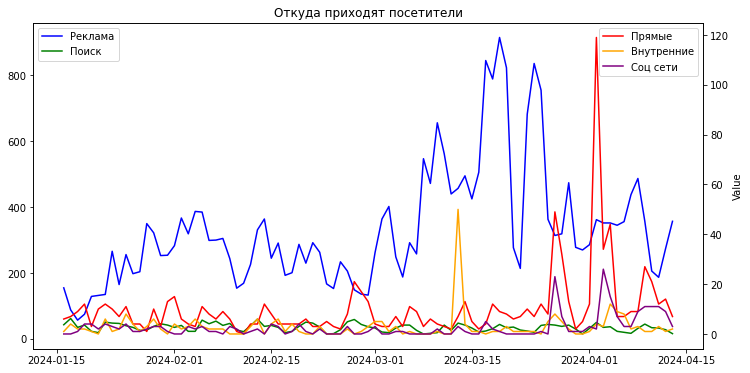

In [138]:
# Установка размера графика
plt.figure(figsize=(12, 6))

# Построение графиков для ads и search
plt.plot(df['date'], df['ads'], label='Реклама', color='blue')
plt.plot(df['date'], df['search'], label='Поиск', color='green')
plt.legend(loc='upper left')  # Легенда для ads и search

# Добавление правой шкалы
plt.twinx()

# Построение графиков для direct, intro, so_net
plt.plot(df['date'], df['direct'], label='Прямые', color='red')
plt.plot(df['date'], df['intro'], label='Внутренние', color='orange')
plt.plot(df['date'], df['so_net'], label='Соц сети', color='purple')
plt.legend(loc='upper right')  # Легенда для direct, intro и so_net

# Добавление названий осей и заголовка
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Откуда приходят посетители')

# Вывод графика
plt.show()


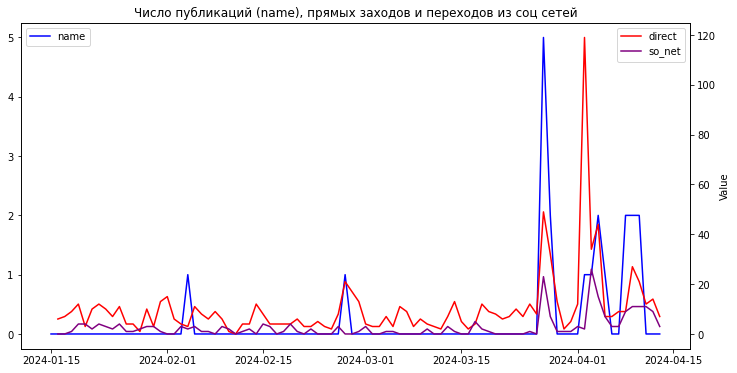

In [124]:
# Установка размера графика
plt.figure(figsize=(12, 6))

# Построение графиков для ads и search
plt.plot(df['date'], df['name'], label='name', color='blue')

plt.legend(loc='upper left')  # Легенда для ads и search

# Добавление правой шкалы
plt.twinx()

# Построение графиков для direct, intro, so_net
plt.plot(df['date'], df['direct'], label='direct', color='red')
plt.plot(df['date'], df['so_net'], label='so_net', color='purple')
plt.legend(loc='upper right')  # Легенда для direct, intro и so_net

# Добавление названий осей и заголовка
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Число публикаций (name), прямых заходов и переходов из соц сетей')

# Вывод графика
plt.show()

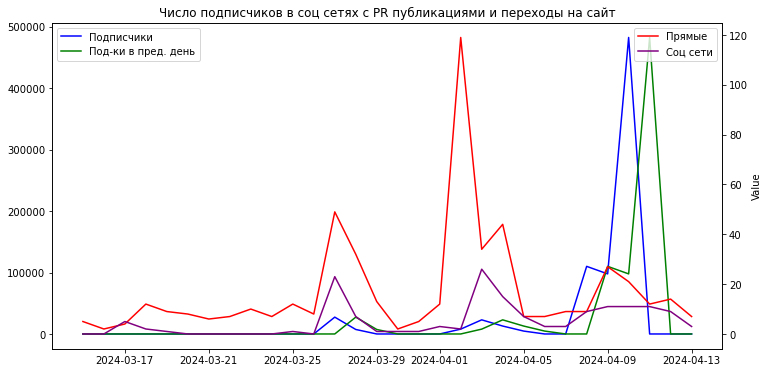

In [140]:

df_filtered = df[df['date'] >= '2024-03-15']

# Установка размера графика
plt.figure(figsize=(12, 6))

# Построение графиков для subscribers и subscribers_shifted1
plt.plot(df_filtered['date'], df_filtered['subscribers'], label='Подписчики', color='blue')
plt.plot(df_filtered['date'], df_filtered['subscribers_shifted1'], label='Под-ки в пред. день', color='green')
plt.legend(loc='upper left')  # Легенда для subscribers и subscribers_shifted1

# Добавление правой шкалы
plt.twinx()

# Построение графиков для direct и so_net
plt.plot(df_filtered['date'], df_filtered['direct'], label='Прямые', color='red')
plt.plot(df_filtered['date'], df_filtered['so_net'], label='Соц сети', color='purple')
plt.legend(loc='upper right')  # Легенда для direct и so_net

# Добавление названий осей и заголовка
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Число подписчиков в соц сетях с PR публикациями и переходы на сайт')

# Вывод графика
plt.show()


In [141]:
print('Среднее по прямым заходам')
df['direct'].mean()


Среднее по прямым заходам


10.191011235955056

In [142]:
print('Среднее по переходам из соц сетей')
df['so_net'].mean()

Среднее по переходам из соц сетей


2.6741573033707864

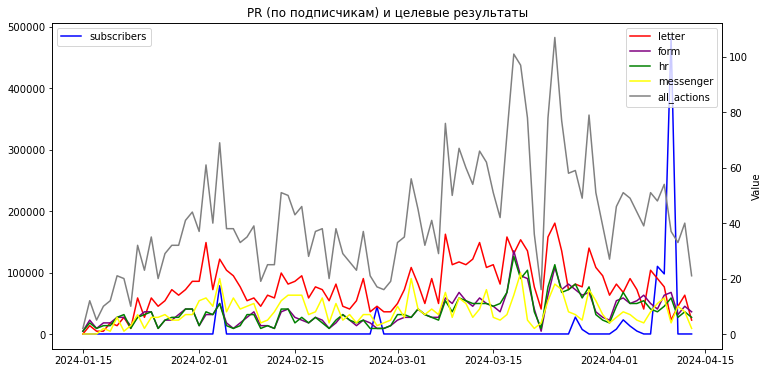

In [40]:
# Установка размера графика
plt.figure(figsize=(12, 6))

# Построение графиков для ads и search
plt.plot(df['date'], df['subscribers'], label='subscribers', color='blue')
plt.legend(loc='upper left')  # Легенда для ads и search

# Добавление правой шкалы
plt.twinx()

# Построение графиков для direct, intro, so_net
plt.plot(df['date'], df['letter'], label='letter', color='red')
plt.plot(df['date'], df['form'], label='form', color='purple')
plt.plot(df['date'], df['hr'], label='hr', color='green')
plt.plot(df['date'], df['messenger'], label='messenger', color='yellow')
plt.plot(df['date'], df['all_actions'], label='all_actions', color='grey')         
plt.legend(loc='upper right')  # Легенда для direct, intro и so_net

# Добавление названий осей и заголовка
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('PR (по подписчикам) и целевые результаты')

# Вывод графика
plt.show()

In [41]:
#добавим скользящую среднюю для 'all_actions' чтобы лучше понимать влияние pr событий
df['all_actions_7'] = df['all_actions'].rolling(window=7).mean().round(1)

In [42]:
df[['direct', 'so_net', 'all_actions', 'form', 'hr', 'letter', 'messenger']].mean().round(1)

direct         10.2
so_net          2.7
all_actions    41.3
form            8.3
hr              8.0
letter         16.9
messenger       8.1
dtype: float64

In [43]:
pd.set_option('display.max_rows', None) 
df[['date', 'subscribers', 'name', 'direct', 'so_net', 'all_actions', 'all_actions_7',
    'form', 'hr', 'letter', 'messenger']]

,date,subscribers,name,direct,so_net,all_actions,all_actions_7,form,hr,letter,messenger
0,2024-01-15,0.0,0.0,NaN,NaN,2,NaN,1,1,0,0
1,2024-01-16,0.0,0.0,6.0,0.0,12,NaN,5,4,3,0
2,2024-01-17,0.0,0.0,7.0,0.0,5,NaN,2,2,1,0
3,2024-01-18,0.0,0.0,9.0,1.0,10,NaN,4,3,1,2
4,2024-01-19,0.0,0.0,12.0,4.0,12,NaN,4,3,4,1
5,2024-01-20,0.0,0.0,3.0,4.0,21,NaN,6,6,3,6
6,2024-01-21,0.0,0.0,10.0,2.0,20,11.7,6,7,6,1
7,2024-01-22,0.0,0.0,12.0,4.0,10,12.9,3,2,2,3
8,2024-01-23,0.0,0.0,10.0,3.0,32,15.7,6,6,13,7
9,2024-01-24,0.0,0.0,7.0,2.0,23,18.3,8,7,6,2


In [44]:
#собираем данные в таблицы для анализа эффективности PR постов

grouped_df = df.groupby('name').agg({
    'date': 'size',
    'direct': 'sum',
    'so_net': 'sum',
    'all_actions': 'sum',
    'form': 'sum',
    'hr': 'sum',
    'letter': 'sum',
    'messenger': 'sum'
      # Подсчет числа строк в каждой группе
})

# Переименование столбца с числом строк
grouped_df = grouped_df.rename(columns={'date': 'days'})

grouped_df['name'] = [0.0, 1.0, 2.0, 5.0]
# Создаем новый столбец 'posts' с учетом условия
grouped_df['posts'] = grouped_df.apply(lambda row: row['days'] if row['name'] == 0 else row['name'] * row['days'], axis=1)



# Вывод результата
print ('Группировка данных по числу публикаций в день')
print(' ')
print(grouped_df)
print(' ')
print(' ')



grouped_df_divided = grouped_df.div(grouped_df['days'], axis=0).round(1)

print("Показатели в расчете на один день")
print(' ')
print(grouped_df_divided)
print(' ')
print(' ')


#вычисляем прирост показателей 
#в дни публикации относительно средних показатаелей в дни без публикаций

# Выбираем только указанные переменные
selected_columns = ['direct', 'so_net', 'all_actions', 'form', 'hr', 'letter', 'messenger']

# Функция для вычисления разницы между каждым значением и значением из первой строки
def calculate_difference(column):
    first_value = column.iloc[0]  # Значение из первой строки
    return column.apply(lambda x: x - first_value)  # Возвращает разницу между каждым значением и значением из первой строки

# Применяем функцию к каждому столбцу

grouped_df_divided_diff = grouped_df_divided[selected_columns].apply(calculate_difference)
grouped_df_divided_diff['posts'] = grouped_df_divided['posts']


# Выводим результат
print('Прирост показателей в дни публикаций в сравнении с днями без публикаций')
print('       ')
print(grouped_df_divided_diff)
print(' ')
print(' ')

grouped_df_divided_diff_post = grouped_df_divided_diff.div(grouped_df_divided_diff['posts'], axis=0).round(1)
print("Показатели прироста в расчете на публикацию")
print(' ')
print(grouped_df_divided_diff_post.iloc[1:])
print(' ')
print(' ')

Группировка данных по числу публикаций в день
 
      days  direct  so_net  all_actions  form   hr  letter  messenger  name  \
name                                                                          
0.0     79   541.0   125.0         3191   617  599    1337        638   0.0   
1.0      5   184.0    37.0          227    50   49      86         42   1.0   
2.0      5   133.0    53.0          237    63   55      79         40   2.0   
5.0      1    49.0    23.0           59    16   18      18          7   5.0   

      posts  
name         
0.0    79.0  
1.0     5.0  
2.0    10.0  
5.0     5.0  
 
 
Показатели в расчете на один день
 
      days  direct  so_net  all_actions  form    hr  letter  messenger  name  \
name                                                                           
0.0    1.0     6.8     1.6         40.4   7.8   7.6    16.9        8.1   0.0   
1.0    1.0    36.8     7.4         45.4  10.0   9.8    17.2        8.4   0.2   
2.0    1.0    26.6    10.6       

В дни публикаций:
- Растет число прямых переходов и переходов из соц сетей (кратно)
- Возрастает общее число целевых действий (на 10-50%) +5+20 
- Заполнение форм увеличивается на 25%-120%, hr аналогично, писем не меняется мессенджеров не меняется. 

Каждая публикация дает:
- 10-30 прямых заходов, 4-6 переходов из соц сетей
- 4-5 целевых действий (среднее 4,06), примерно в равных долях заполнение форм и запрос в HR (есть гипотеза. что это одни и теже люди, но с точки зрения целевых действий мы суммируем эти показатели).
- Публикации не влияют на отправку писем и переход в мессенджер отдела кадров.


In [45]:
df_pr.tail(20)

,social_network,name,subscribers,price,date
0,tg,Геологи,587,200,2024-03-27
1,tg,ГеоВакансия,4163,0,2024-03-27
2,tg,Самосвалы СПБ. Нерудные материалы,2700,1500,2024-03-27
3,tg,Смелый Геолог,963,500,2024-03-27
4,tg,Бурятия. Дальше некуда,1661,5000,2024-03-28
5,tg,Геоэнергетика ИНФО,78462,10000,2024-02-04
6,tg,Металл и Минерал,5719,5000,2024-04-04
7,tg,Geojob - Канал для геодезиста,4713,0,2024-04-05
8,tg,РАБОТА ВАХТОЙ | ВАКАНСИИ | БЕСПЛАТНО,1059,0,2024-04-08
9,tg,⚒️⛏СОЮЗ ВАХТОВИКОВ 🔧🔩,1797,0,2024-04-09


In [46]:
#УДАЛИТЬ????

#CСчитаем стоимость публикации

df_pr['price'] = pd.to_numeric(df_pr['price'], errors='coerce')

# Выбираем только строки, где значения столбца 'price' не равны нулю
df_pr_filtered = df_pr.loc[df_pr['price'] != 0]

# Рассчитываем среднее значение по столбцу 'price'
average_price = df_pr_filtered['price'].mean()

# Выводим результат
print("Средняя стоимость публикации (исключая строки с нулевым значением):", average_price)

Средняя стоимость публикации (исключая строки с нулевым значением): 2338.4615384615386


In [50]:
print ('Общая сумма расходов на PR за исследуемый период')
print (df_pr['price'].sum())



print ('Общее число целевых действий по рекламе за период')
print(grouped_df_divided_diff['all_actions'].sum())

Общая сумма расходов на PR за исследуемый период
30400
Общее число целевых действий по рекламе за период
30.6


#### СТОИМОСТЬ ЦЕЛЕВОГО ДЕЙСТВИЯ ПО PR АКТИВНОСТИ

## 576 рублей

#### Общая сумма расходов: 30 400 руб
#### Общее число целевых действий за период: 31 

## ПОЧЕМУ РАСХОДЯТСЯ ЦИФРЫ????

### ДРУГОЙ ВАРИАНТ РАССЧЕТА

Возьму данные по каждой не бесплатной публикации и посчитают стоимость одного целевого действия по каждой публикации
Посчитаю среднюю по этим данным



In [70]:
df_pr_effect = df[['date', 'price', 'name', 'direct',  'so_net', 
                   'all_actions', 'letter', 'form', 'hr', 'messenger']]

In [89]:
df_pr_effect = df_pr_effect.dropna(subset=['price'])
df_pr_effect = df_pr_effect[df_pr_effect['price'] != 0]
df_pr_effect.round(1).head(30)

,date,price,name,direct,so_net,all_actions,letter,form,hr,messenger,cost_per_action,cost_per_direct,cost_per_so_net,cost_per_letter,cost_per_form
20,2024-02-04,10000.0,1.0,-3.8,0.4,28.6,10.1,3.2,3.4,11.9,349.7,-2631.6,25000.0,990.1,3125.0
72,2024-03-27,3200.0,5.0,42.2,21.4,18.6,1.1,8.2,10.4,-1.1,172.0,75.8,149.5,2909.1,390.2
73,2024-03-28,5000.0,2.0,25.2,5.4,8.6,0.1,6.2,5.4,-3.1,581.4,198.4,925.9,50000.0,806.5
79,2024-04-03,1400.0,1.0,27.2,24.4,10.6,-1.9,5.2,7.4,-0.1,132.1,51.5,57.4,-736.8,269.2
80,2024-04-04,6500.0,2.0,37.2,13.4,8.6,3.1,3.2,3.4,-1.1,755.8,174.7,485.1,2096.8,2031.2
84,2024-04-08,200.0,2.0,2.2,7.4,7.6,3.1,1.2,0.4,2.9,26.3,90.9,27.0,64.5,166.7
85,2024-04-09,2000.0,2.0,20.2,9.4,13.6,0.1,6.2,2.4,4.9,147.1,99.0,212.8,20000.0,322.6
86,2024-04-10,2100.0,2.0,14.2,9.4,-3.4,-11.9,7.2,5.4,-4.1,-617.6,147.9,223.4,-176.5,291.7


In [73]:
zero_pr = grouped_df_divided[['direct', 'so_net', 'all_actions', 'form',  'hr', 'letter', 'messenger' ]]

In [75]:
zero_pr = grouped_df_divided[['direct', 'so_net', 'all_actions', 'form',  'hr', 'letter', 'messenger']].iloc[0]

In [77]:
df_pr_effect[['direct', 'so_net', 'all_actions', 'form', 'hr', 'letter', 'messenger']] -= zero_pr.values

In [79]:
df_pr_effect['cost_per_action'] = df_pr_effect['price'] / df_pr_effect['all_actions']
df_pr_effect['cost_per_direct'] = df_pr_effect['price'] / df_pr_effect['direct']
df_pr_effect['cost_per_so_net'] = df_pr_effect['price'] / df_pr_effect['so_net']
df_pr_effect['cost_per_letter'] = df_pr_effect['price'] / df_pr_effect['letter']
df_pr_effect['cost_per_form'] = df_pr_effect['price'] / df_pr_effect['form']


In [82]:
df_pr_effect.round(0).head(30)

,date,price,name,direct,so_net,all_actions,letter,form,hr,messenger,cost_per_action,cost_per_direct,cost_per_so_net,cost_per_letter,cost_per_form
20,2024-02-04,10000.0,1.0,-4.0,0.0,29.0,10.0,3.0,3.0,12.0,350.0,-2632.0,25000.0,990.0,3125.0
72,2024-03-27,3200.0,5.0,42.0,21.0,19.0,1.0,8.0,10.0,-1.0,172.0,76.0,150.0,2909.0,390.0
73,2024-03-28,5000.0,2.0,25.0,5.0,9.0,0.0,6.0,5.0,-3.0,581.0,198.0,926.0,50000.0,806.0
79,2024-04-03,1400.0,1.0,27.0,24.0,11.0,-2.0,5.0,7.0,-0.0,132.0,51.0,57.0,-737.0,269.0
80,2024-04-04,6500.0,2.0,37.0,13.0,9.0,3.0,3.0,3.0,-1.0,756.0,175.0,485.0,2097.0,2031.0
84,2024-04-08,200.0,2.0,2.0,7.0,8.0,3.0,1.0,0.0,3.0,26.0,91.0,27.0,65.0,167.0
85,2024-04-09,2000.0,2.0,20.0,9.0,14.0,0.0,6.0,2.0,5.0,147.0,99.0,213.0,20000.0,323.0
86,2024-04-10,2100.0,2.0,14.0,9.0,-3.0,-12.0,7.0,5.0,-4.0,-618.0,148.0,223.0,-176.0,292.0


In [87]:
def calculate_mean(df, columns):
    return df_pr_effect[columns][(df_pr_effect[columns] > 0) & (df_pr_effect[columns] < 10000)].mean()

columns_to_process = ['cost_per_action', 'cost_per_direct', 
                      'cost_per_so_net', 'cost_per_letter', 'cost_per_form']

# Вызов функции для вычисления средних значений
mean_values = calculate_mean(df_pr_effect, columns_to_process).round(0)

# Вывод результатов
print(mean_values)

cost_per_action     309.0
cost_per_direct     120.0
cost_per_so_net     297.0
cost_per_letter    1515.0
cost_per_form       925.0
dtype: float64


### Еще один вариант рассчета - еще одна цифра )))

Проблема в том, что у нас очень мало наблюдений и показатели действий по разным каналам сильно различаются в каждый день

### РАССЧЕТ СТОИМОСТИ ЦЕЛЕВОГО ДЕЙСТВИЯ ПО РЕКЛАМЕ БЕЗ УЧЕТА PR ЭФФЕКТА


In [54]:
#Рассчитываем стоимость целевого действия по рекламе

#таблица для рассчета
df_ads_cost = df[['date', 'sum', 'shows', 'name', 'all_actions']]


In [55]:
#удаляем целевые действия в результате PR активности (по средним)

df_ads_cost.loc[:, 'all_actions_clear'] = df_ads_cost.apply(lambda row: row['all_actions'] - row['name']*4.06, axis=1)


C:\Users\OLEG\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [56]:
df_ads_cost.loc[:, 'cost_action'] = df_ads_cost.apply(
    lambda row: row ['sum'] / row['all_actions_clear'], axis=1)

In [57]:
print ('Общая сумма расходов на рекламу за исследуемый период')
print (df_ads_cost['sum'].sum())

print ('Общее число целевых действий по рекламе за период')
print(df_ads_cost['all_actions_clear'].sum())

Общая сумма расходов на рекламу за исследуемый период
114477.88
Общее число целевых действий по рекламе за период
3632.8


In [58]:
df_ads_cost['cost_action'].mean()

47.89627739854057

#### СТОИМОСТЬ ЦЕЛЕВОГО ДЕЙСТВИЯ ПО РЕКЛАМНОЙ АКТИВНОСТИ

## 48 рублей


## РЕГРЕССИОННАЯ МОДЕЛЬ 

зависимость всех целевых действий от 
расходов на рекламу
расходов на PR 
бесплатных PR публикаций
дня недели (опция ???)

In [106]:
#формирую датасет

df_reg = df [['date', 'sum',
                 'all_actions',
                 'price',
                 'name',
                 ]]

In [107]:
# Создание копии DataFrame
df_reg_copy = df_reg.copy()

# Создание новой переменной 'free_pr' в копии DataFrame
df_reg_copy['free_pr'] = np.where((df_reg_copy['price'] == 0) & (~df_reg_copy['price'].isnull()), 1, 0)
df_reg_copy['price'].fillna(0, inplace=True)
# Теперь df_reg_copy содержит новый столбец 'free_pr' без ошибок




Mean Squared Error: 308.9156329944527
R^2 Score: 0.21638907035149502


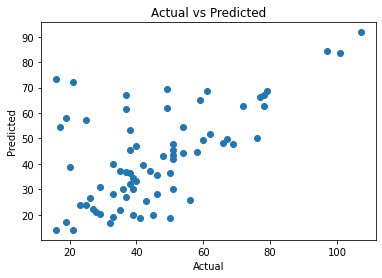

 
Коэффициенты модели (веса признаков): [0.03147687 0.00452243]
Смещение (свободный член): 0.0


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Подготовка данных
# ...

# Разделение на обучающий и тестовый наборы X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Извлечение данных для y_train после 31.01.2024
y_train = df_reg_copy[df_reg_copy['date'] > '2024-01-31']['all_actions']

# Извлечение данных для X_train после 31.01.2024 из нескольких столбцов
X_train = df_reg_copy[df_reg_copy['date'] > '2024-01-31'][['sum', 'price']]
#X_train = df_reg_copy[df_reg_copy['date'] > '2024-01-31'][['sum', 'price', 'free_pr']]

#y_train = df_reg_copy['all_actions']
#X_train = df_reg_copy[['sum', 'price', 'free_pr']]
#X_train = df_reg_copy[['sum', 'price']]

# Построение модели
model = LinearRegression(fit_intercept=False)
#model = LinearRegression()
model.fit(X_train, y_train)

# Оценка качества модели
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Визуализация данных
plt.scatter(y_train, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


# Коэффициенты модели (веса признаков)
coefficients = model.coef_

# Смещение (свободный член)
intercept = model.intercept_
print(" ")
print("Коэффициенты модели (веса признаков):", coefficients)
print("Смещение (свободный член):", intercept)

C:\Users\OLEG\AppData\Local\Temp/ipykernel_19740/314322560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_copy_graph['predicted'] = y_pred


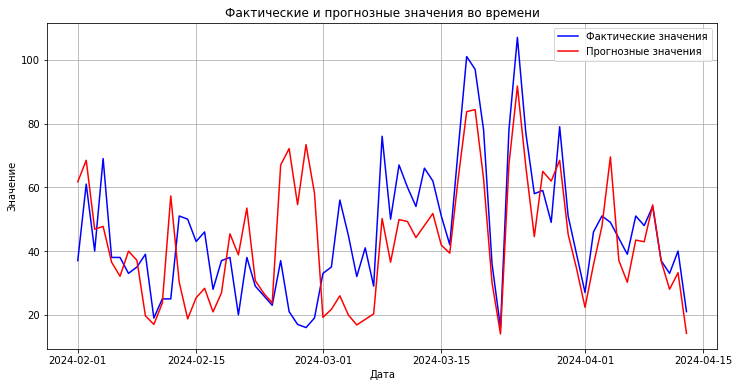

In [123]:

df_reg_copy_graph = df_reg_copy[df_reg_copy['date'] > '2024-01-31']

df_reg_copy_graph['predicted'] = y_pred


plt.figure(figsize=(12, 6))
plt.plot(df_reg_copy_graph['date'], df_reg_copy_graph['all_actions'], label='Фактические значения',  color='blue')
plt.plot(df_reg_copy_graph['date'], df_reg_copy_graph['predicted'], label='Прогнозные значения',  color='red')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Фактические и прогнозные значения во времени')
plt.legend()
plt.grid(True)
plt.show()

#### МОДЕЛИ РЕГРЕССИИ ДЛЯ ОЦЕНКИ КОЭФФИЦИЕНТОВ ИНВЕСТИЦИЙ В ДИРЕКТ И ПУБЛИКАЦИИ

Задача прогнозирования не ставилась на данном этапе, единственная цель, понять насколько хорошо фактическая ситуация описывается моделью и какие коэффициенты для каждого из показателей получаются.

Во всех моделях бесплатные публикации имели отрицательный эффект, что не имеет практического смысла (когда платные публикации имеют положительный эффект). Я рассматриваю это как ложную корреляцию и исключил эти данные. Качество моделей практически не изменилось.
Также есть варианты где исключается свободный член. Фактическая компания подняла целевые дейсвтия с 0, поэтому говорить о некоем "естественном" уровне (или уровне сущесвующем без рекламной поддержки нельзя). Говорить о уже накопленном эффекте также преждевнеменно.

Первая модель (со свободным членом, со всеми данными):

y = 18,2 + 0,017 * sum + 0,0036 * price  -5,89 * free_pr
R^2 Score: 0.279

Вторая модель (без свободного члена, все данные):
y = 0,029 * sum + 0,0049 * price  -3,08 * free_pr
R^2 Score: 0.146

Третья модель(без свободного члена, без бесплатных публикаций):
y = 0,029 * sum + 0,0049 * price
R^2 Score: 0.145

Четвертая модель (с фев, когда модель обучилась, со своб членом):
y = 19 + 0,02 * sum + 0,003 * price  -10,1 * free_pr
R^2 Score: 0.368


Пятая модель (с фев, со св членом, без беспл публикаций):
y = 18,7 + 0,02 * sum + 0,003 * price 
R^2 Score: 0.358

Шестая модель (с фев, без св члена, без беспл публикаций):
y = 0,031 * sum + 0,0045 * price 
R^2 Score: 0.216

При этом на графике (по последней модели) мы видим, что есть несколько зон серьезных ошибок, в остальном рассчетные величины совпадают с фактическими. 


Целевое действие от директа 32 рубля
Целевое действие от PR 222 рубля

### ВАРИАНТ МОДЕЛИ РЕГРЕССИИ ОТ ЧИСЛА ПОКАЗОВ И PR ПУБЛИКАЦИЙ

In [127]:
df_reg_show = df [['date', 'shows','all_actions', 
              'weekday','name']]

Mean Squared Error: 147.07517331301653
R^2 Score: 0.6590536272223213


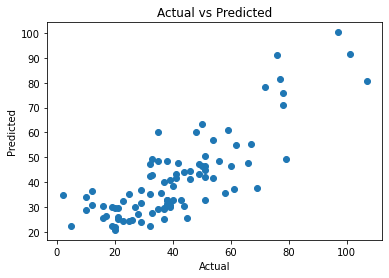

 
Коэффициенты модели (веса признаков): [1.43858294e-03 4.97418604e+00]
Смещение (свободный член): 13.663665095009254


In [131]:
# Извлечение данных для y_train после 31.01.2024
#y_train = df_reg_show[df_reg_copy['date'] > '2024-01-31']['all_actions']
y_train = df_reg_show['all_actions']

# Извлечение данных для X_train после 31.01.2024 из нескольких столбцов
X_train = df_reg_show [['shows', 'name']]
#X_train = df_reg_show [df_reg_copy['date'] > '2024-01-31'][['shows', 'name']]
#X_train = df_reg_show [df_reg_copy['date'] > '2024-01-31'][['sum', 'price', 'free_pr']]

#y_train = df_reg_copy['all_actions']
#X_train = df_reg_copy[['sum', 'price', 'free_pr']]
#X_train = df_reg_copy[['sum', 'price']]

# Построение модели
#model = LinearRegression(fit_intercept=False)
model = LinearRegression()
model.fit(X_train, y_train)

# Оценка качества модели
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Визуализация данных
plt.scatter(y_train, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


# Коэффициенты модели (веса признаков)
coefficients = model.coef_

# Смещение (свободный член)
intercept = model.intercept_
print(" ")
print("Коэффициенты модели (веса признаков):", coefficients)
print("Смещение (свободный член):", intercept)

#### МОДЕЛИ ЗАВИСИМОСТИ ЦЕЛЕВЫХ ДЕЙСТВИЙ ОТ ПОКАЗОВ И СТАТЕЙ

Модель 7 (от показов и статей с февраля)

y = 0,002 * show + 6,87 * name 
R^2 Score: 0.486


Модель 8 (с начала со свободным членом)
y = 13.66 + 0,0014 * show + 4.97 * name 
R^2 Score: 0.659


Последняя модель показывает, что число целевых действий достаточно хорошо описывается линейной регрессионной моделью.

Около 14 целевых действий выглядят как стабильный ежедневный фон
714 показов обеспечивают 1 целевое действие
1 публикация обеспечивает почти 5 целевых действий

При применении денежных величин ситуация усложняется, т.к. цены на показы за этот период менялись в 2 раза, а цены на PR публикации от 0 до 10 000 руб

C:\Users\OLEG\AppData\Local\Temp/ipykernel_19740/1638662734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_copy_graph['predicted'] = y_pred


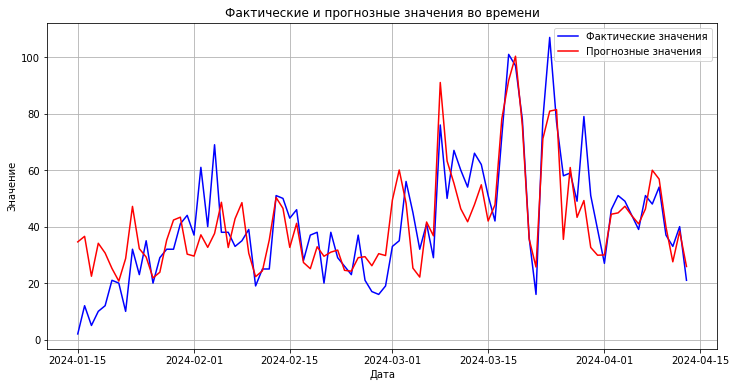

In [133]:
#df_reg_copy_graph = df_reg_show[df_reg_show['date'] > '2024-01-31']
df_reg_copy_graph = df_reg_show
df_reg_copy_graph['predicted'] = y_pred


plt.figure(figsize=(12, 6))
plt.plot(df_reg_copy_graph['date'], df_reg_copy_graph['all_actions'], label='Фактические значения',  color='blue')
plt.plot(df_reg_copy_graph['date'], df_reg_copy_graph['predicted'], label='Прогнозные значения',  color='red')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Фактические и прогнозные значения во времени')
plt.legend()
plt.grid(True)
plt.show()

план отчета:

- график модели и факта - инструменты прямо влияют на целевые действия
- роль / стоимость каждого вида действий
- ПР для сайта влияет на прямые заходы (поиск) они на Целевые действия
- удачные не удачные ПР активности (посмотреть тематику, может быть дорогие и неэффективные это редкие специалисты)

- 